In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Clearly sales is my target variable and TV, radio and newspaper are my features. This is a supervised learning problem

In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.shape

(200, 4)

##### Add some EDA steps like scatterplot, pairplot, distplot, heatmap, outlier plot etc

### Shuffle and Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = data[['TV']]
target = data[['sales']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .85, random_state=10)

print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (170, 1)
Test set of features:  (30, 1)
Target for train:  (170, 1)
Target for test:  (30, 1)


In [9]:
X_train

,TV
25,62.3
44,206.9
102,296.4
164,163.5
22,237.4
...,...
114,209.6
65,131.1
16,195.4
126,87.2


### Learn the model on train data

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
my_model = LinearRegression()

In [12]:
# Train the model
my_model.fit(X_train, y_train)

LinearRegression()

### Test the model

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
#Predictions on unseen data
y_pred = my_model.predict(X_test)

In [25]:
# MAE

mean_absolute_error(y_pred, y_test)

3.095721364975426

In [21]:
# Compare with the true values, MSE

mean_squared_error(y_pred, y_test)

14.459872664611302

In [23]:
#RMSE
np.sqrt(mean_squared_error(y_pred, y_test))

3.8026139252639495

In [ ]:
from sklearn.datasets import load_boston

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error ,mean_absolute_error
A=pd.read_csv(r'C:\Users\Arbaj\Desktop\Demo Datasets\Lesson 4\Advertising.csv',index_col=0)
A.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [57]:
A.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [58]:
A.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [59]:
A.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [60]:
from sklearn.preprocessing import StandardScaler
B=StandardScaler()
A[['TV']]=B.fit_transform(A[['TV']])
A[['radio']]=B.fit_transform(A[['radio']])
A[['newspaper']]=B.fit_transform(A[['newspaper']])
A.head()

,TV,radio,newspaper,sales
1,0.969852,0.981522,1.778945,22.1
2,-1.197376,1.082808,0.669579,10.4
3,-1.516155,1.528463,1.783549,9.3
4,0.052050,1.217855,1.286405,18.5
5,0.394182,-0.841614,1.281802,12.9


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(A.iloc[:,:-1],A['sales'],test_size=0.1,random_state=12)

In [62]:
from sklearn.linear_model import LinearRegression
C=LinearRegression()
model=C.fit(X_train,y_train)
pred=model.predict(X_test)
mse=mean_squared_error(pred,y_test)
mse

1.6734561670609545

C:\Users\Arbaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

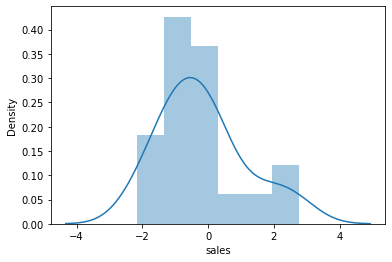

In [63]:
sns.distplot(pred-y_test,kde=True)

(2.0, 25.0)

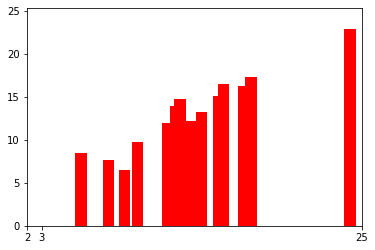

In [65]:
plt.bar(y_test,pred,color='red')
plt.xticks([1,2,3,25])
plt.xlim(2,25)
